In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

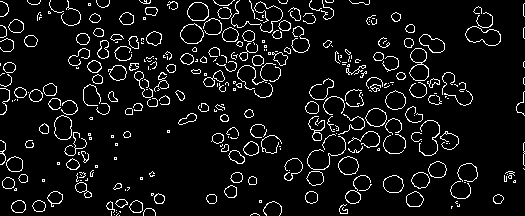

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in ushort_scalars


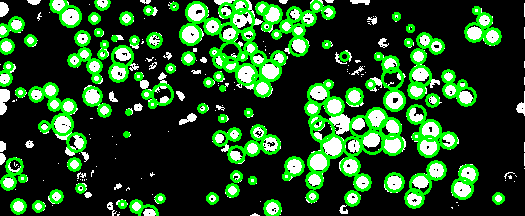

163


In [ ]:

src = cv2.imread('random_forest_result.bmp', 0)
input = src.copy()
contour, _ = cv2.findContours(src,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contour:
  cv2.drawContours(src,[cnt],0,255,-1)
# cv2_imshow(src)
# output_image = np.zeros(src.shape)
# cv2_imshow(output_image)
edges = cv2.Canny(src,100,200)
cimg = cv2.cvtColor(input,cv2.COLOR_GRAY2BGR)
cv2_imshow(edges)

# circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,10,50,
                            # param1=50,param2=30,minRadius=0,maxRadius=0)

circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, minDist=10,
                    param1=20, param2=10, minRadius=0, maxRadius=12)
circles = np.uint16(np.around(circles))
count = 0

true_circles = []
true_circles.append(circles[0][0])

for i in range(circles[0].shape[0]):
  flag = True
  for j in range(circles[0].shape[0]):
    if i == j:
      continue
    # print(i[0] , j[0], i[1] , j[1])
    result= ((((circles[0, i, 0] - circles[0, j, 0] )**2) + ((circles[0, i, 1] - circles[0, j, 1] )**2) )**0.5)
    # print(result)
    if result < 10:
      flag=False
    
    
  if flag:
    true_circles.append(circles[0, i])
      # break


count =0
for i in true_circles:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    # cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    count += 1
cv2_imshow(cimg)
print(count)
# cv.waitKey(0)
# cv.destroyAllWindows()